In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import graphviz as gv
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz


### Q1

In [ ]:
ir = load_iris()
iris_df = pd.DataFrame(ir.data, columns=ir.feature_names)
target_df = pd.DataFrame(data= ir.target, columns= ['species'])

def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
X_train, X_test, y_train, y_test = train_test_split(iris_df, target_df, random_state = 50, test_size=0.25)
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-18-92417ac323ab>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


### Q2

In [ ]:
print("PREDICTION = "+str(clf.predict([[4,4,3,3]])))


PREDICTION = ['virginica']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Confusion Matrix")
feature_imp=np.array(confusion_matrix(y_test,y_pred))
feature_imp

Confusion Matrix


array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]])

In [ ]:
print("ACCURACY OF THE TEST SET=",metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_, index = ir.feature_names).sort_values(ascending = False)
feature_imp
print(classification_report(y_test, y_pred))

ACCURACY OF THE TEST SET= 0.9473684210526315
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      0.93      0.93        15
   virginica       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Q3

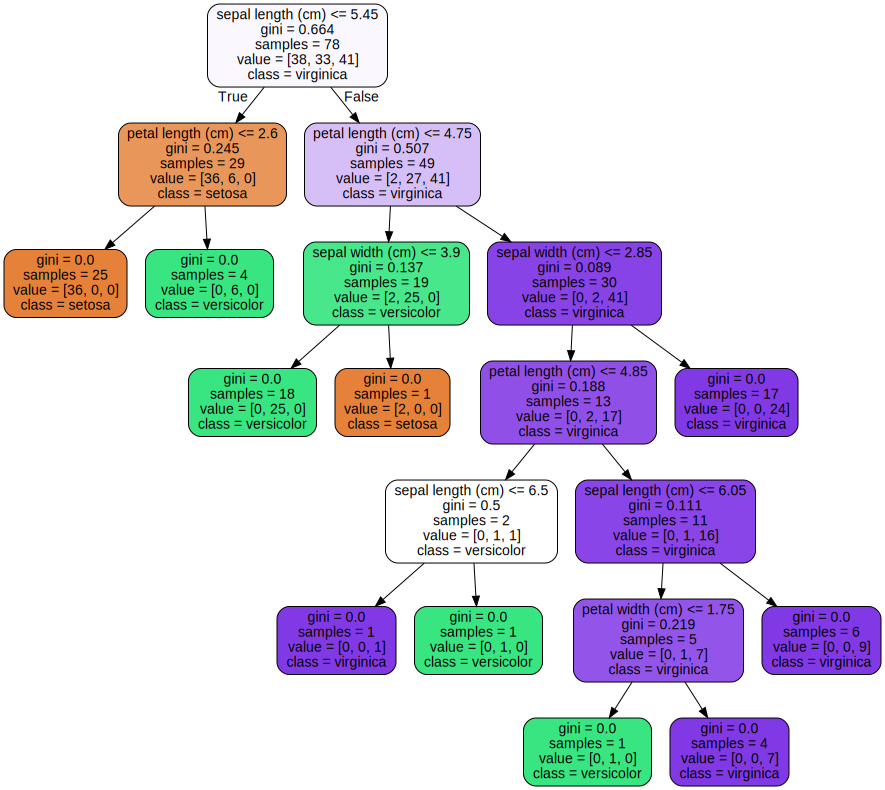

In [ ]:
dot_data = export_graphviz(clf[2],
                           feature_names=ir.feature_names,
                           class_names=ir.target_names,
                           filled=True, impurity=True,
                           rounded=True)

graph = gv.Source(dot_data, format='png')
graph